In [1]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Environmental Data Analysis</strong>, Fall 2022<br>
            Peter F. Grinde-Hollevik<br>
            Ray Zhou<br>
            Dr. Eric Van Dusen<br>
            Dr. Daniel Hammer<br>
        </p></td></tr>
</table>

   # LAB 7: Constructing the Marginal Abatement Cost Curve for Methane Gas

We're now entering an interesting part of DATA88: Environmental Data Analysis. In the next 3 weeks, we'll focus on 3 different environmental economic theories, and use material I, (Peter) built for a series of lectures in DATA88: Economic Models in 2021. For your reference, I'll give you access to the corresponding textbook chapter written for the same occasion. Think of the labs as really hammering in the knowledge you'll gain from my mini-lectures (on Fridays) and those readings.

## Learning objectives


* Understanding of how to construct the of The McKinsey Greenhouse Gas (GHG) Marginal Abatement Cost Curve (MAC).
* Understanding of how to compare different MAC curves across industries and regions.

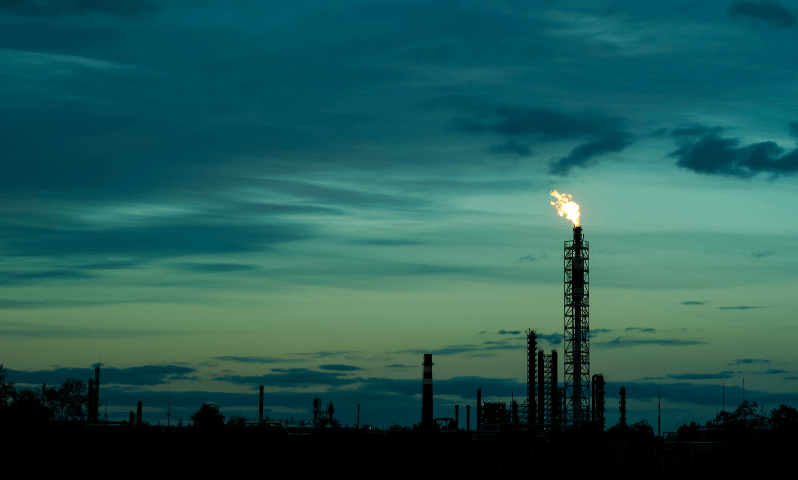

**Methane Illustration of Global MAC curve**

Please refer to the "Marginal Abatement Cost Curves" chapter for a thorough introduction to abatement curves. This is an empirical application of what you should learn through your readings.

The data behind in the 2009 McKinsey Carbon Dioxide abatement curve is difficult to reproduce, and is out of date technologically.  For this empirical case study we are relying on a dataset published by the International Energy Association for methane emissions from the oil and gas sector.  One important starting point is that Methane is more powerful than CO2 in trapping heat in the atmosphere, *80 times more potent in the first 20 years and 20 times more powerful when average over 100 years*. Methane emissions from the energy sector contribute 1/3 of all human caused methane emissions.  

**This dataset and documentation are from**: 

- Methane Emissions from Oil and Gas Report from IEA (https://www.iea.org/reports/methane-emissions-from-oil-and-gas)
- IEA Methane Tracker (2021) (https://www.iea.org/articles/methane-tracker-database).

Let's start off with a summary about global oil and gas methane emissions from their report:

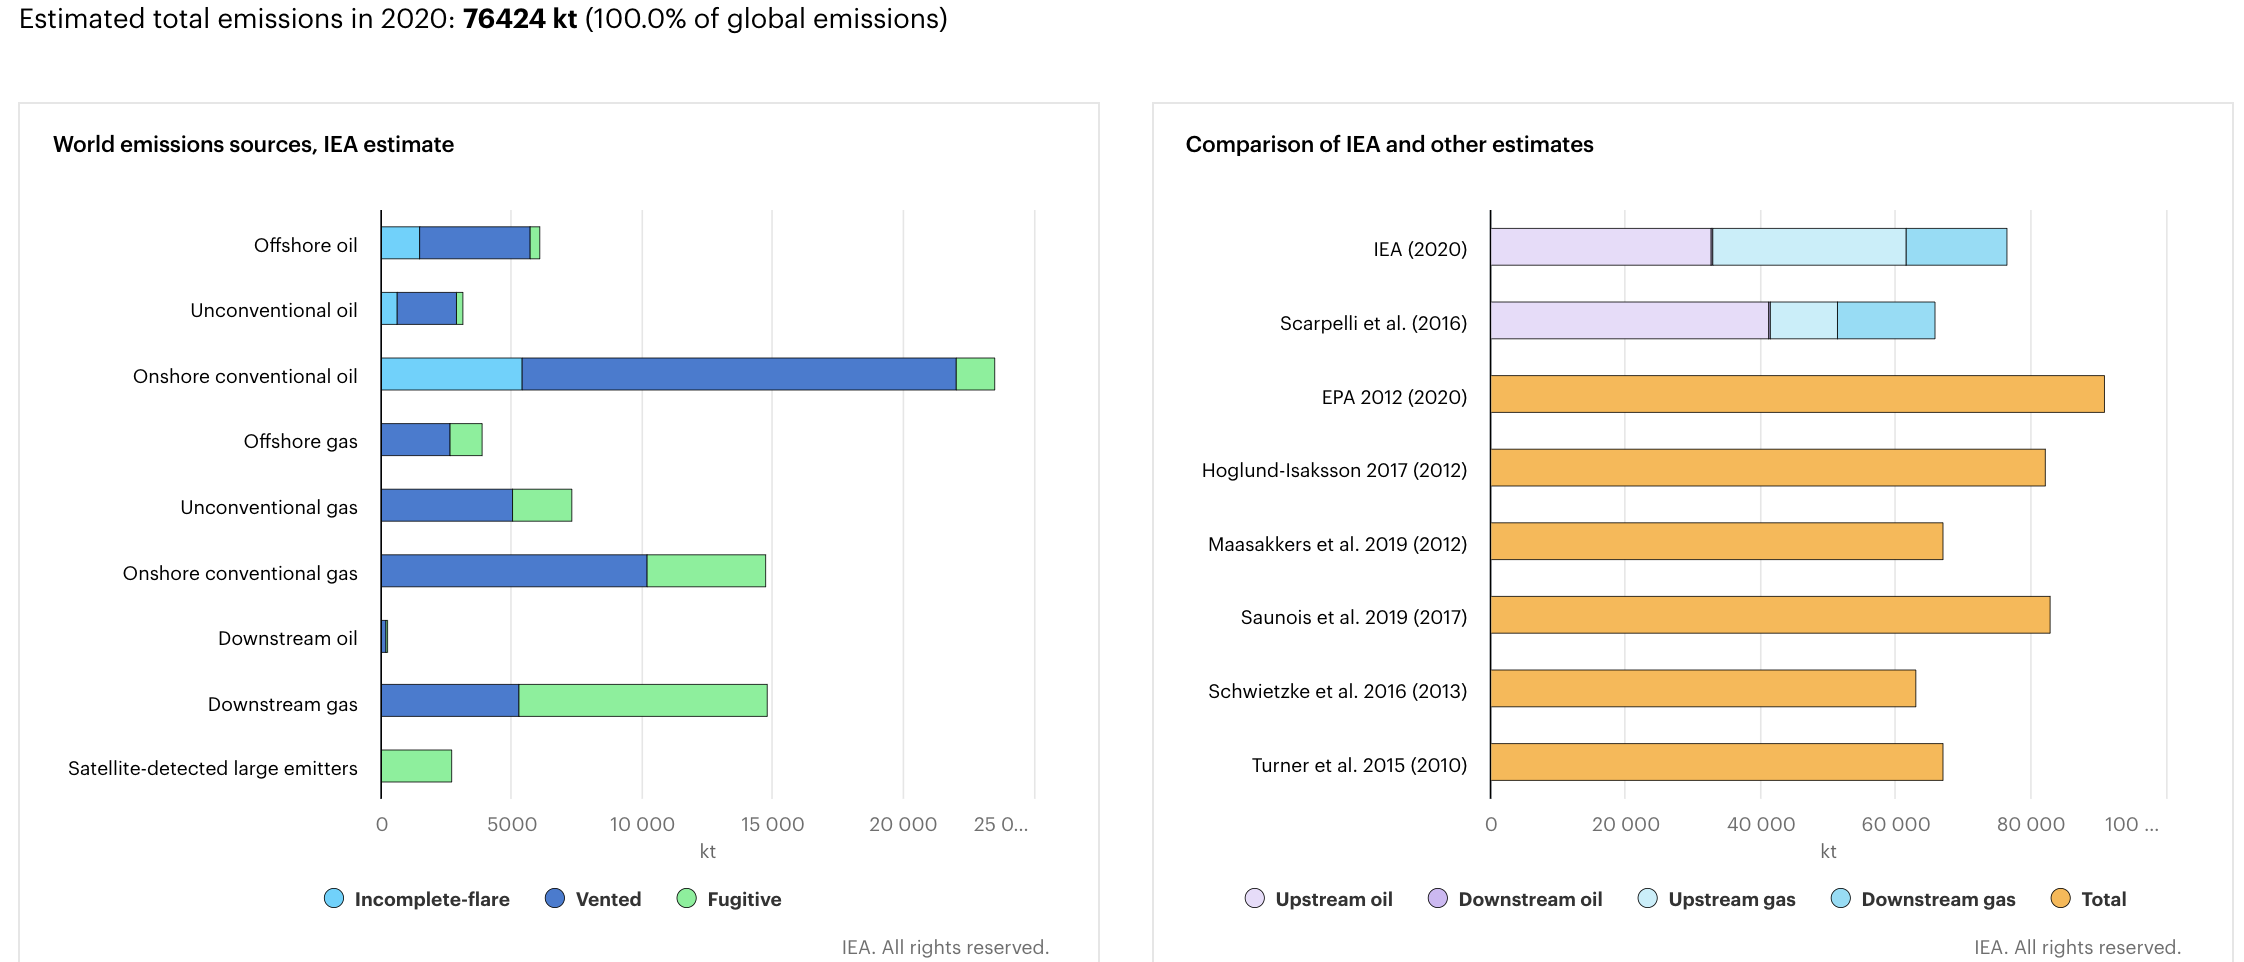

The chart on the left offers indications of where these methane emissions occur within the oil and gas industry.  The chart on the right indicates where the IEA estimates fall in respect to other recent studies.  This clearly illustrates the enormous potential of methane emission abatement in the world's oil and gas sector. With high abatement potential, it is important to understand the various abatement technologies and their costs. 

### Constructing the MAC Curve

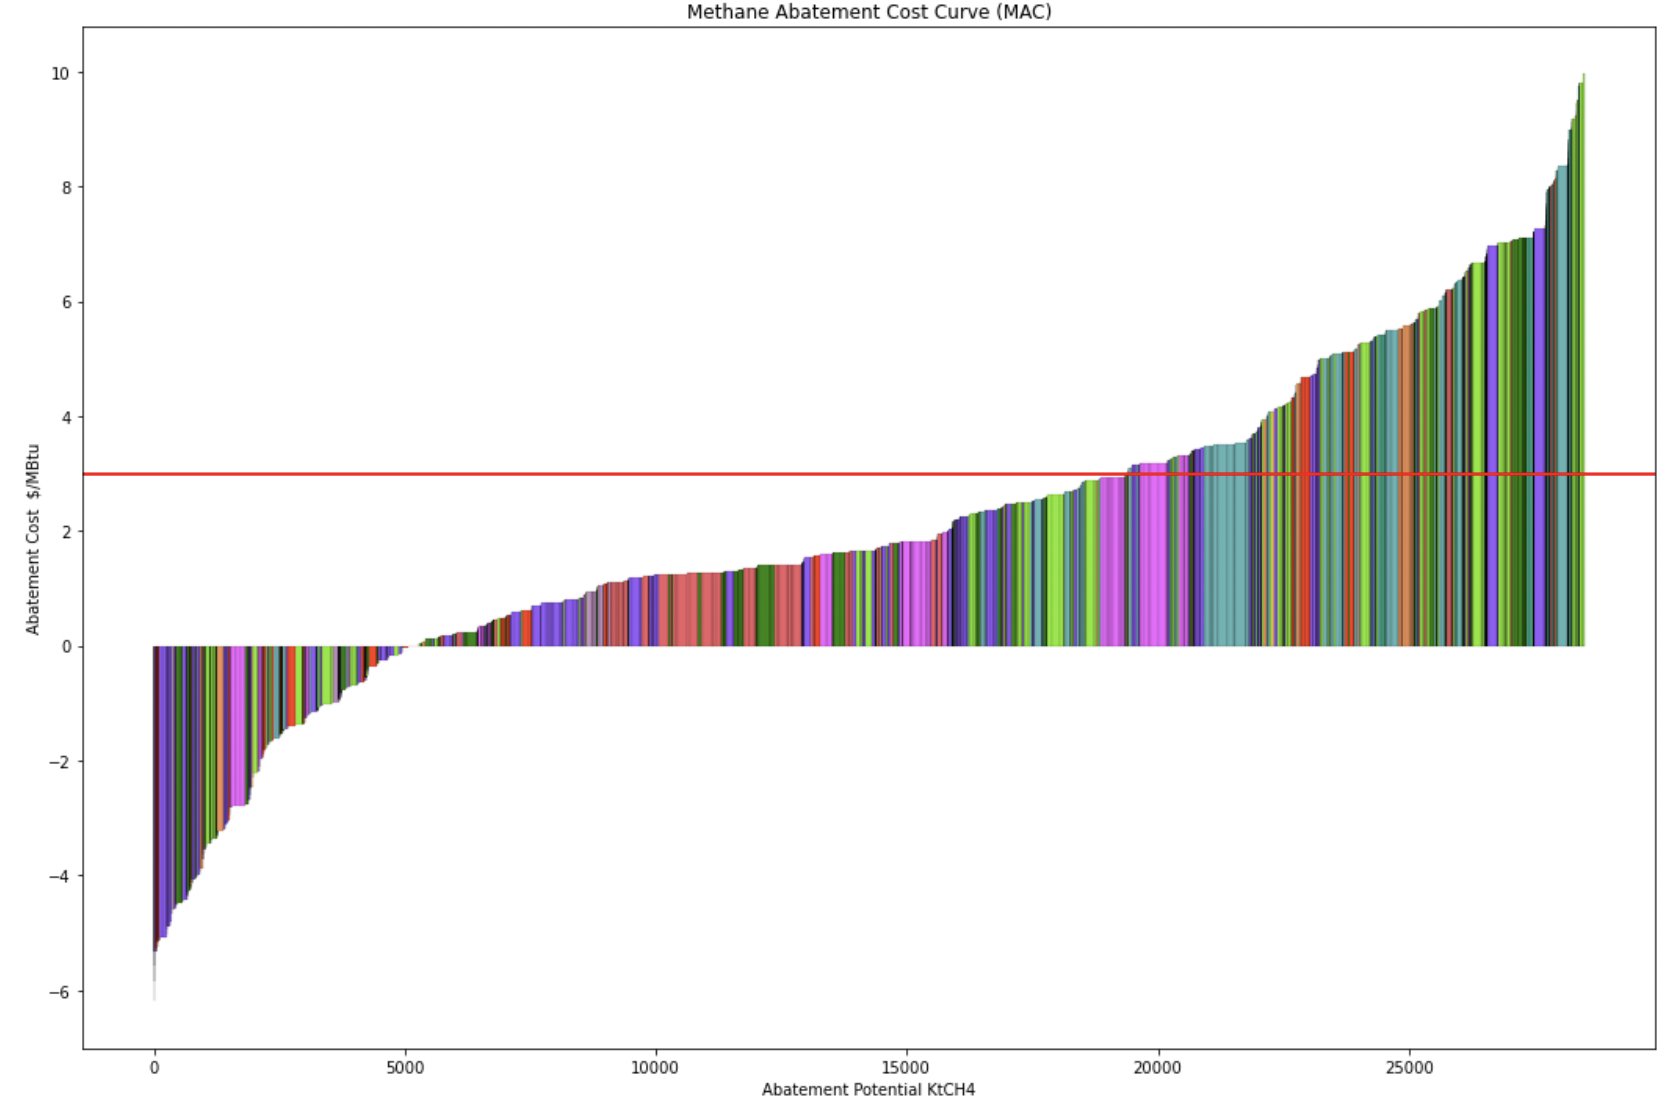

Let's now look at the Marginal Abatement Cost (MAC) Curve. Our end goal is referenced above, but before you start - It will be super-helpful to do the readings.

**The Marginal Abatement Cost Curve**

The Marginal Abatement Cost Curve gives policy makers and firms an opportunity to differentiate the costs of the multiple approaches we have in reducing our GHG (carbon (CO2) / Methane (CH4)) emissions. It shows where society can get the best “bang for the buck” when the goal is to abate carbon emissions. Each rectangle represents a specific technology or policy (e.g switch to LED lights or install Carbon Capture Systems (CCS) in older coal plants). The width represents the abatement potential for each technology in tons of GHG, and the height tells us the respective marginal abatement curve.

Before we construct our MAC curve however, let's review some basic concepts of the MAC.

**Question 1:** What do the X and Y axes of a MAC curve represent?

*Enter your answer here...*

**Question 2:** Why are the costs of some abatement technologies negative?

*Enter your answer here...*

**Question 3:** How might the Emissions Abatement alternative promote a greater reduction in GHGs compared to the Business-as-Usual (BAU) alternative?

*Enter your answer here...*

We would like to construct an MAC for all abatement technologies in the Asia Pacific region. We start by importing a dataset on methane abatement from the International Environmental Agency (IEA). 

In [5]:
data = Table.read_table("abatement_data.csv")
data

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Emissions,Possible Savings,Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,0.91,-5.33


**Question  4:** Start by selecting the rows with `'Cost'` between -10.1 and 10 USD, `Possible Savings` below 200 tons. Relabel these `Abatement Cost`and `Abatement Potential`, correspondingly. Then, drop the `Emissions`column.Create a table containing all abatement technologies in the Asia Pacific region with columns `Abatement Potential` and `Abatement Cost`.

In [6]:
abatement_table = Table.read_table("abatement_data.csv").where(...).where(...)
abatement_table_drop = abatement_table.drop(...)
abatement_table = abatement_table_drop.relabel(...).relabel(...)
abatement_table

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


**Question 4b:** Interpret the column `Abatement technology`. Where does it fit into the Marginal Abatement Cost Curve? *Hint*: Do the readings.

*Enter your answer here...*

**Question  5:**  The Second column is `Region`. To begin with, let's select the Asia Pacific region.
The first MAC is drawn for the Asia Pacific region.  This is approximately 1/4 of all emissions.  Later, our analysis for the Asia Pacific Region can compared to North America.

In [7]:
selection = ...
abatement_table_ap = abatement_table.where('Region', ...)
abatement_table_ap

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


#### MACs and Taxes
As we previously covered, we can use the MAC curve to find the total abatement potential of an excise tax.

**Question 5a:** In your own words, what is an excise tax?

*Your answer here...*

**Question 5b:** What is an excise in the context of marginal abatement costs? *Hint:* Think where you place it on the marginal abatement cost curve (*Hint*: It's a line!)

*Your answer here...*

**Question 5c:** Calculate the total abatement for a tax of $4 on methane emissions.

In [ ]:
abatement_under_4 = abatement_table_ap.where(...)
abatement_at_4 = sum(...)
abatement_at_4

**Question 6a:** Define a function that calculates the total abatement for a given tax level.

In [2]:
def total_abatement(tax_level):
    abatement_under_tax = abatement_table_ap.where('Abatement Cost', ...)
    return sum(...)

**Question 6b:** Explain geometrically, using the MAC curve, what this function does.

*Your answer here...*

**Question 7a:** Create a table of abatement technologies using `abatement_table_ap` we can use to create an MAC. The table should contain a column titled `Abatement Cost` containing the cost of abatements sorted in ascending order, and `Cumulative Abatement Potential` containing the cumulative abatement potential of all technologies with cost at or below the corresponding abatement cost.

In [ ]:
cumulative_potential = np.cumsum(...)
abatement_table_cumulative = abatement_table_ap.with_column(...)
abatement_cumulative_sorted = abatement_table_cumulative.drop(...).sort(...)
abatement_cumulative_sorted

#### Plotting Functions
Building the MAC requires some data manipulations to build this specific visualization.  The first is that the width of the columns will be the quantity of abatement.  The height ( whether positive or negative) will be the cost.  

For drawing the plot we need to actually find the middle point in each column so that we place each abatement technology at the right place on the MAC. The seconds part runs the function on our x and y axis.

In [8]:
# Making columnn widths for the Asia Pacific _ap Region
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

#Prepare the data for plotting
width_group = abatement_table_ap.column('Abatement Potential')
height_group = abatement_table_ap.column('Abatement Cost')
new_x_group = find_x_pos(width_group)

**Question 7b:** Why do you think we need to find the middle point of each abatement technology when we plot the MAC?

*Your answer here...*

### Policy Analysis Tool
Now lets add a tool in to see the effects of a tax.  With the following function, we introduce level of taxation to measure the total abatement outcome later.

In [9]:
def methane_tax(tax, table):
    if tax < min(table.column('Abatement Cost')):
        print("No Abatement")
    else:
        abatement = table.where('Abatement Cost', are.below_or_equal_to(tax))
        total_abatement = sum(abatement.column('Abatement Potential'))
        abatement_technologies = abatement.column('Abatement technology')
        
        print('Total Abatement (kt CH4): ', np.round(total_abatement,2))
        print("")

**Question 8a:** What do the first two lines of codes underneath the `def` statement do? 

*Your answer here...*

#### Plot the graph, with tax line
The next function takes the methane_tax function and does plots all the possible abatement opportunities. 

Try to understand what each "plt" part does if you're interested!

def group_plot(tax):
    print(f"Methane Tax ($/MBtu): ${tax}")
    methane_tax(tax, abatement_table_ap)
    plt.figure(figsize=(16,10))
    plt.bar(new_x_group, height_group,width=width_group,edgecolor = 'black')
    plt.title(selection)
    plt.xlabel('Abatement Potential KtCH4')
    plt.ylabel('Abatement Cost $/MBtu')
    plt.axhline(y=tax, color='r',linewidth = 2)
    
group_plot(4)

**Question 8b:** Looking at question 5b, what does the red line represent and how does it affect our total abatement potential?

*Your answer here...*

This is an applied MAC for Methane in Asia Pacific! Super cool.


Let's make the plot even more instructive by creating a color mapping of the different abatement technologies.
The solution to this is giving each a different color from a Python dictionary.

In [11]:
#Prepare data for plotting (second round)
width = abatement_table_ap.column('Abatement Potential')
height = abatement_table_ap.column('Abatement Cost')
new_x = find_x_pos(width)

#Let's give each type of technology a different color!
abatement_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5','#85E827','#F165FD','#1F9F7F','#945CF8','#ff3a1d','#2a8506']
for i in set(abatement_table_ap['Abatement technology']):
    abatement_colors_dict[i] = colors[count]
    count += 1

colors_mapped = list(pd.Series(abatement_table_ap['Abatement technology']).map(abatement_colors_dict))
abatement_table_ap = abatement_table_ap.with_column('Color', colors_mapped)

**Question 8c:** What's something we really should keep in mind as data scientists when adding colours to our plots? 

*Your answer here...*

Methane Tax: $3
Total Abatement (kt CH4):  4392.6



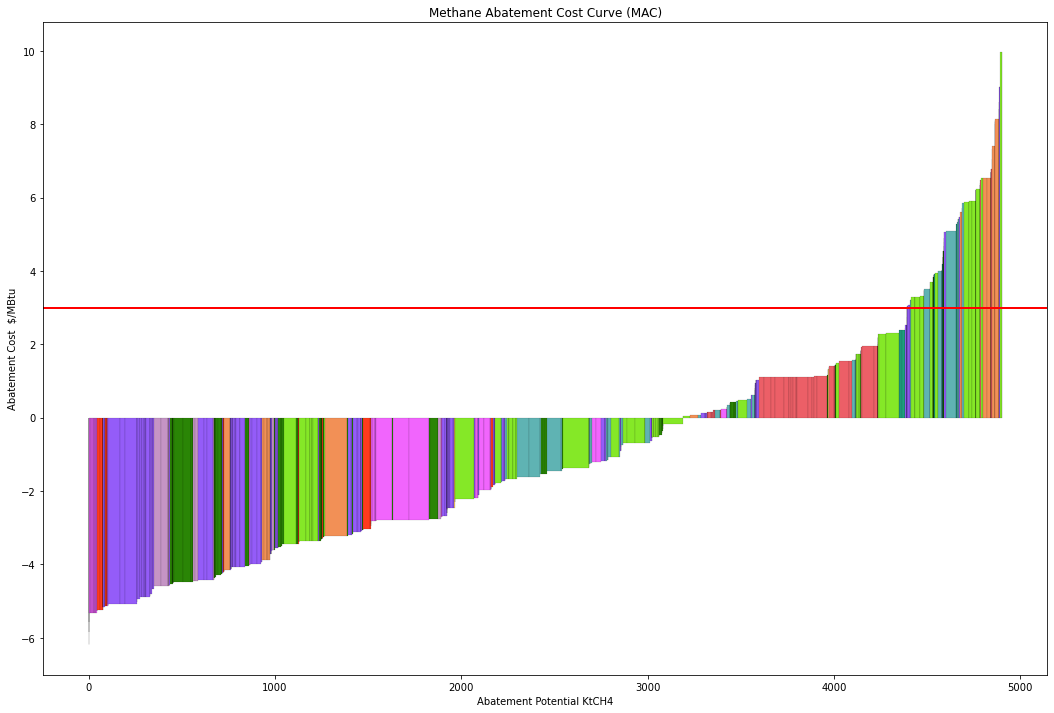

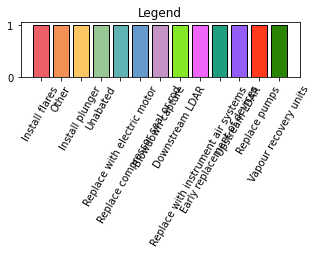

In [12]:
#The Methane curve plot - function!
def mckinsey_curve(tax, abatement_table):
    print(f"Methane Tax: ${tax}")
    methane_tax(tax, abatement_table_ap)
    plt.figure(figsize=(18,12))
    plt.bar(new_x, height, width=width, linewidth=0.1, color=abatement_table['Color'], edgecolor = "black")
    plt.title('Methane Abatement Cost Curve (MAC)')
    plt.xlabel('Abatement Potential KtCH4')
    plt.ylabel('Abatement Cost  $/MBtu')
    plt.axhline(y=tax, color='r', linewidth = 2)

    plt.figure(figsize=(5,1))
    plt.bar(abatement_colors_dict.keys(), 1, color = abatement_colors_dict.values())
    plt.xticks(rotation=60)
    plt.title('Legend')
    
mckinsey_curve(3, abatement_table_ap)

#### Color MAC plot for Asia Pacific Region
Nice Plot!   From here, we can differentiate the multiple methane abatement technologies on a cost basis, finding the most efficient ways of reducing methane emissions from gas production.

Looking at the Asia Region we can see that most of the opportunities on this graph have a negative cost- meaning that it makes economic sense to make the technological improvements.

We also observe the result of introducing a tax: With a tax of $3 per ton, we expect the total abatement to be almost 4300 tons within this industry.

**Question 8d:** What are two limitations of the MAC? Describe each in 2 sentences. `Hint:` It's in the textbook!

*Enter your answer here...*

**Question 9:** Now, it's on you to repeat the process of constructing the MAC for North America!

Methane Tax: $3
Total Abatement (kt CH4):  4392.6



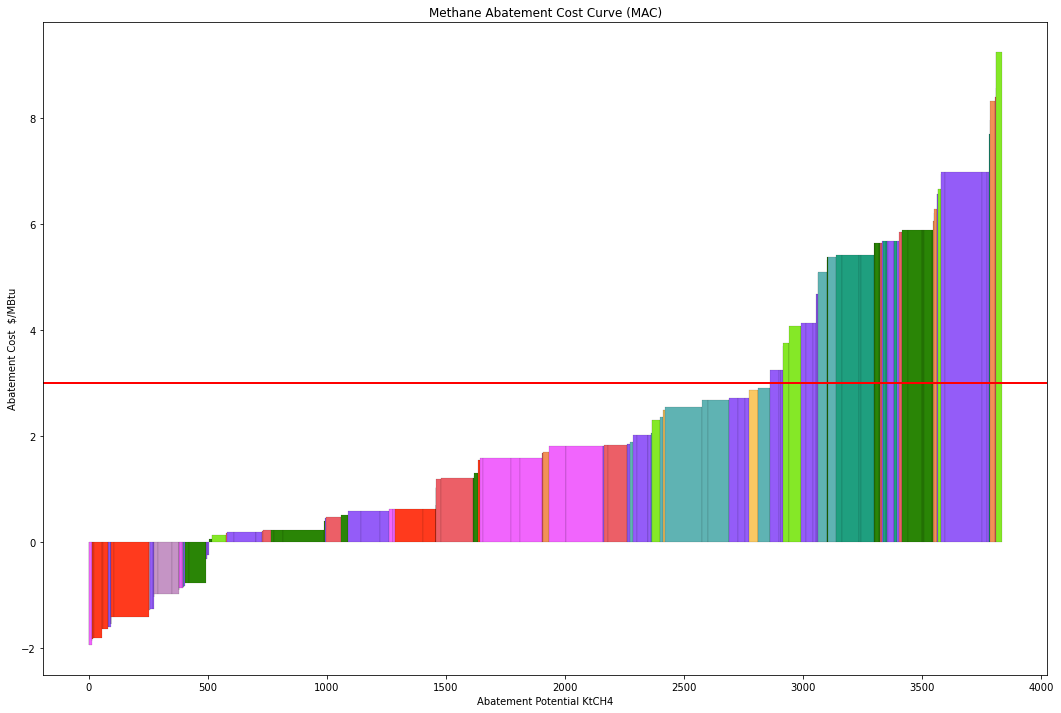

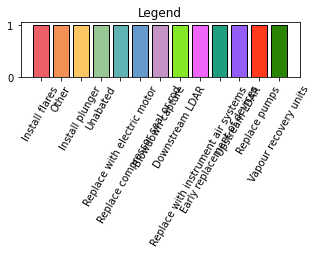

In [13]:
selection = ...
abatement_table_us = ...
abatement_table_us

#Prepare data for plotting (North America. _us)
width = abatement_table_us.column(...)
height = abatement_table_us.column(...)
new_x = find_x_pos(width)

colors_mapped = list(pd.Series(abatement_table_us['Abatement technology']).map(abatement_colors_dict))
abatement_table_us = abatement_table_us.with_column('Color', colors_mapped)

mckinsey_curve(3, abatement_table_us)

**Question 10:** Finally, lets build the table for the Global emissions (all regions)

Methane Tax: $3
Total Abatement (kt CH4):  4392.6



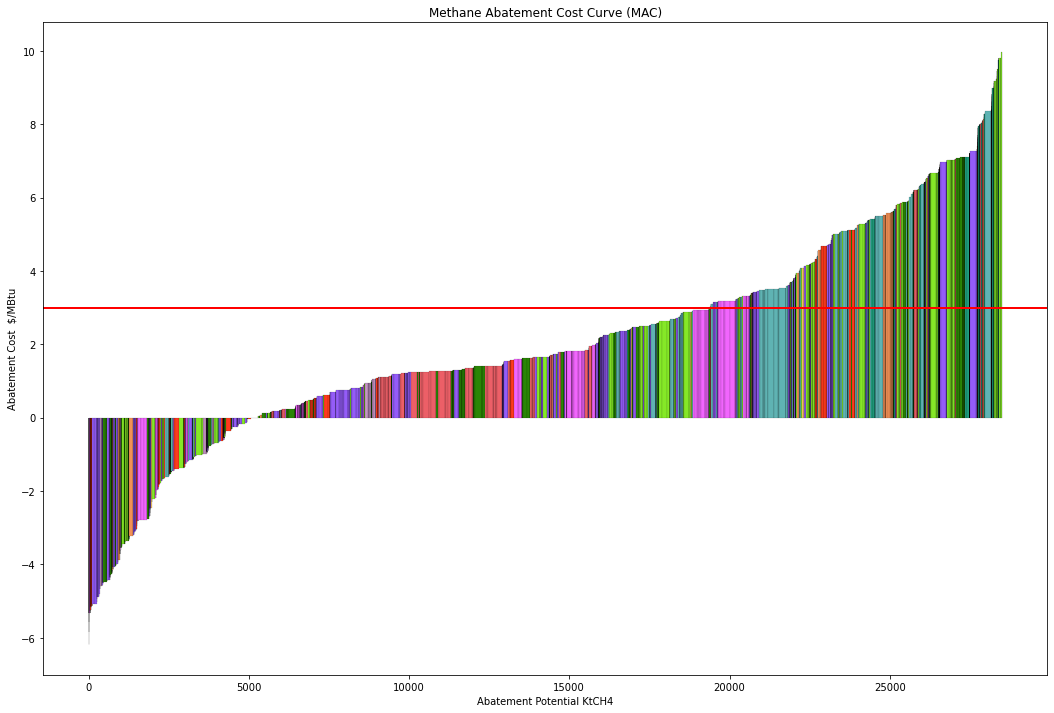

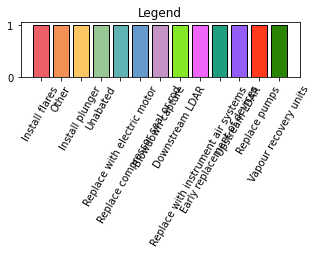

In [14]:
width = abatement_table.column(...)
height = abatement_table.column(...)
new_x = find_x_pos(width)

colors_mapped = list(pd.Series(abatement_table['Abatement technology']).map(abatement_colors_dict))
abatement_table = abatement_table.with_column('Color', colors_mapped)

mckinsey_curve(3, abatement_table)

**Question 11:** Compare the three plots above on at least three points. I suggest looking at shape, degree of negative costs (and what that says about the methane market), different abatement technologies, and which technologies you would start off abating (using to remove emissions) and what would be your last in each region.

*Your answer here...*

### Challenge for the student:

You might have noticed how the author of this chapter (Peter) repeats certain lines of code. My challenge to you would be to find these lines and write one big function (or multiple small ones) that streamlines the whole process. Let me know at hollevik@berkeley.edu or ed when you figure it out! 

**Congratulations! You finished Lab 7!**

*This lab was built by Peter F. Grinde-Hollevik and Ray Zhou*